In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats

In [18]:
path_data = r'E:\python\projects\apartments\data'
path_pickle = r'E:\python\projects\apartments\pickle'

In [19]:
df_waw = pd.read_excel(path_data + '\web_scrap.xlsx')
df_waw.head()

,link,miasto,dzielnica,cena,od,poziom,umeblowanie,zabudowa,powierzchnia,pokoje,czynsz dodatkowo
0,https://www.olx.pl/oferta/dwupokojowe-z-oddzie...,"Warszawa,",Targówek,2300,Biuro / Deweloper,2,1,Apartamentowiec,60,2,1
1,https://www.olx.pl/oferta/2-pokoje-bielany-met...,"Warszawa,",Bielany,3000,Osoby prywatnej,3,1,Apartamentowiec,56,2,1
2,https://www.olx.pl/oferta/kawalerka-browary-wa...,"Warszawa,",Śródmieście,2200,Osoby prywatnej,2,1,Apartamentowiec,29,Kawalerka,1
3,https://www.olx.pl/oferta/dwupokojowa-kawalerk...,"Warszawa,",Mokotów,1800,Osoby prywatnej,2,1,Blok,20,2,350
4,https://www.olx.pl/oferta/wynajme-mieszkanie-f...,"Warszawa,",Wawer,2300,Osoby prywatnej,2,1,Apartamentowiec,60,3,500


In [20]:
df_waw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4391 entries, 0 to 4390
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   link              4391 non-null   object
 1   miasto            4391 non-null   object
 2   dzielnica         4391 non-null   object
 3   cena              4391 non-null   int64 
 4   od                4391 non-null   object
 5   poziom            4391 non-null   object
 6   umeblowanie       4391 non-null   int64 
 7   zabudowa          4391 non-null   object
 8   powierzchnia      4391 non-null   int64 
 9   pokoje            4391 non-null   object
 10  czynsz dodatkowo  4391 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 377.5+ KB


Nie ma brakujących danych

In [21]:
df_waw.describe()

,cena,umeblowanie,powierzchnia,czynsz dodatkowo
count,4391.000000,4391.000000,4391.000000,4391.000000
mean,2161.186973,0.961512,42.184013,224.686632
std,5976.163752,0.192393,16.908243,242.662634
min,50.000000,0.000000,1.000000,1.000000
25%,1600.000000,1.000000,31.000000,1.000000
50%,2000.000000,1.000000,40.000000,150.000000
75%,2400.000000,1.000000,50.000000,400.000000
max,395000.000000,1.000000,300.000000,999.000000


Tylko 4 kolumny są numeryczne, niektóre mają mieszaną formę.

In [22]:
for i in df_waw.columns:
    print(i, df_waw[i].unique(), '\n') # unikalne wartości w każdej kolumnie

link ['https://www.olx.pl/oferta/dwupokojowe-z-oddzielna-kuchnia-z-ochrona-24h-CID3-IDG480z.html#aebf69ee9d'
 'https://www.olx.pl/oferta/2-pokoje-bielany-metro-marymont-apartamentowiec-CID3-IDH9Bkb.html#72d7a7dc4d;promoted'
 'https://www.olx.pl/oferta/kawalerka-browary-warszawskie-CID3-IDFOpbo.html#0d85410fb0;promoted'
 ...
 'https://www.olx.pl/oferta/stanow-zjednoczonych-praga-pld-kawalerka-jezioro-goclawskie-0-prowizj-CID3-IDGhorX.html#5a80808650'
 'https://www.olx.pl/oferta/2-pokojowe-przestronne-zoliborz-CID3-IDHiI69.html#839a743bc2'
 'https://www.olx.pl/oferta/czestochowska-25-27-ochota-kawalerka-0-prowizji-CID3-IDGUA7r.html#5a80808650'] 

miasto ['Warszawa,'] 

dzielnica ['Targówek' 'Bielany' 'Śródmieście' 'Mokotów' 'Wawer' 'Wola' 'Bemowo'
 'Białołęka' 'Ursynów' 'Ursus' 'Ochota' 'Praga-Południe' 'Żoliborz'
 'Praga-Północ' 'Wilanów' 'Rembertów' 'Wesoła' 'Włochy'] 

cena [  2300   3000   2200   1800   2000   2100   2800   1900   2700   2350
   1650   1950   2500   4300   1200   245

W kolumnie "pokoje" pojawia się string "Kawalerka". Należy zmienić ich wartość na 1. Następnie przekonwertować wszytkie stringi w kolumnie na liczby.

W kolumnie "poziom", pojawiają się teksty "Parter", "Powyżej 10", "Suterena". O ile parter można przypisać do zera, to pozostałe wartości nie da sie przyrównać do liczby tak aby zachowały swój charakter. Dlatego pozostawie je w tej chwili bez zmian. Natomiast wartości "Tak" i "Nie" w tej kolumnie wdają się być błędne, dlatego je usunę.  

Usuwam duplikaty a nastęnie wyrzucam także kolumnę "link" i "miasto". Robię to w tej kolejności, ponieważ link zapewnia unikalność danych.

In [23]:
def drop_value(df, column, value):
    ''' funkcja do usuwania wybranych wartości '''
    index = df[df[column] == value].index
    df.drop(index=index, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [24]:
index = df_waw[df_waw['pokoje'] == 'Kawalerka'].index
for i in index:
    df_waw.loc[i, 'pokoje'] = 1   
df_waw['pokoje'] = df_waw['pokoje'].astype(int)
    
drop_value(df_waw, 'poziom', 'Tak')
drop_value(df_waw, 'poziom', 'Nie')

df_waw.drop_duplicates(inplace=True)
df_waw.drop(['link', 'miasto'], axis=1, inplace=True)

In [25]:
df_waw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4305 entries, 0 to 4350
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dzielnica         4305 non-null   object
 1   cena              4305 non-null   int64 
 2   od                4305 non-null   object
 3   poziom            4305 non-null   object
 4   umeblowanie       4305 non-null   int64 
 5   zabudowa          4305 non-null   object
 6   powierzchnia      4305 non-null   int64 
 7   pokoje            4305 non-null   int32 
 8   czynsz dodatkowo  4305 non-null   int64 
dtypes: int32(1), int64(4), object(4)
memory usage: 319.5+ KB


In [26]:
df_waw.head()

,dzielnica,cena,od,poziom,umeblowanie,zabudowa,powierzchnia,pokoje,czynsz dodatkowo
0,Targówek,2300,Biuro / Deweloper,2,1,Apartamentowiec,60,2,1
1,Bielany,3000,Osoby prywatnej,3,1,Apartamentowiec,56,2,1
2,Śródmieście,2200,Osoby prywatnej,2,1,Apartamentowiec,29,1,1
3,Mokotów,1800,Osoby prywatnej,2,1,Blok,20,2,350
4,Wawer,2300,Osoby prywatnej,2,1,Apartamentowiec,60,3,500


Całkowity koszt wynajmu mieszkania jest rozbity na kolumny "cena" i "czynsz dodatkowo". Należy je połączyć, a następnie usunąć.  
Dodatkowo, w ramach analizy stworzę kolumnę "cena za pokój".

In [28]:
df_waw['cena całkowita'] = df_waw['cena'] + df_waw['czynsz dodatkowo']
df_waw.drop('cena', axis=1, inplace=True)
df_waw.drop('czynsz dodatkowo', axis=1, inplace=True)

df_waw['cena za pokoj'] = df_waw['cena całkowita']/df_waw['pokoje']
df_waw.reset_index(drop=True, inplace=True)

Funkcja pairplot pozwala wstępnie zapoznać się z wszystkimi numerycznymi danymi.

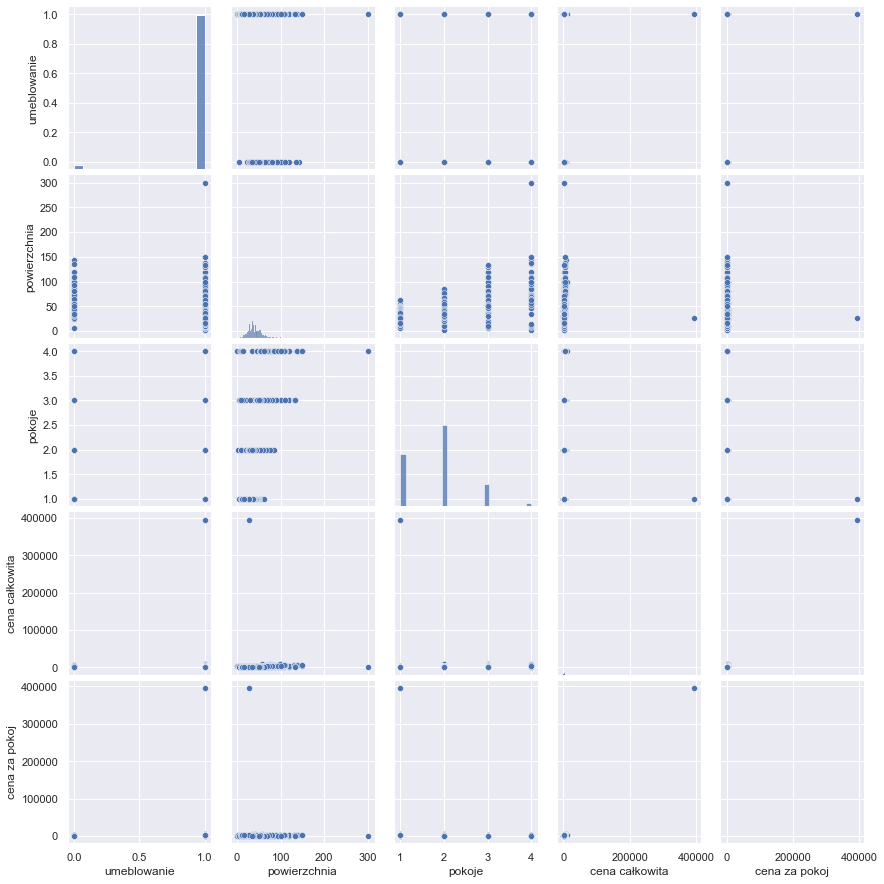

In [29]:
sns.pairplot(df_waw)
plt.show()

Od razu zauważyć można, że w kolumnie "cena za pokoj", pojawiają się dane, które znacznie różnią się od średniej, przez co wszystkie wykresy stają się zniekształcone. Wygląda na to, że ktoś wstawił ogłoszenie wynajmu mieszkania za około 400 000 zł. Prawdopodobnie się pomylił, bo za tą cenę chce raczej mieszkanie sprzedać.

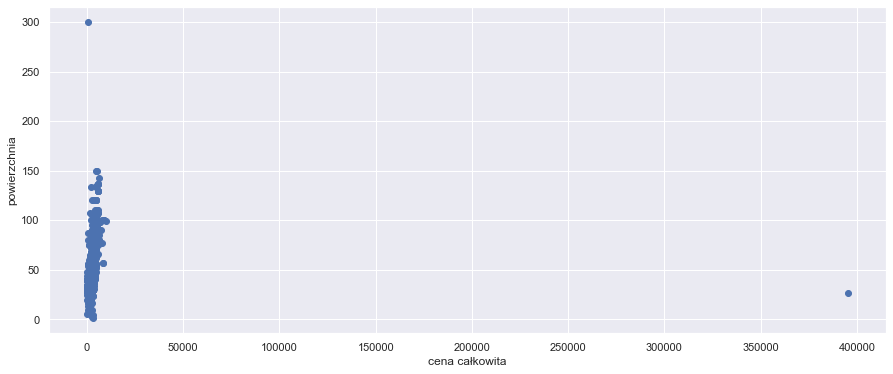

In [30]:
plt.figure(figsize=(15,6))
plt.xlabel('cena całkowita')
plt.ylabel('powierzchnia')
plt.scatter(df_waw['cena całkowita'], df_waw['powierzchnia'])
plt.show()

W 2 kluczowych kolumnach: "powierzchnia" i "cena całkowita" pojawiają się wartości skrajne, które będą zaburzać modelu. Ich wartości odbiegają od średniej na tyle dużo, że muszę je usunąć.

In [31]:
drop_value(df_waw, 'cena całkowita', df_waw['cena całkowita'].max())
drop_value(df_waw, 'powierzchnia', df_waw['powierzchnia'].max())

Tak obrobione dane zapisuję za pomocą *pickle*.

In [34]:
df_waw.to_pickle(path_pickle + '\df_waw_analyse.pickle')